# Part II - Factors affecting APR and how much should you expect
## by Davit Lomadze

## Investigation Overview


The main goal of the investigation is to present what affects Annual Percent Rate (APR) and what should we expect befor taking a loan. 

First Borrower APR will be introduced, how it is distributed. We will observe how income, debt to income ratio, credit score and lastly how APR is distributed by occupation of the borrowers. If occupation reflects income and debt to income ratio, we should see that same occupations have advantages situation in terms of nagotiating for lower APR. Meaning if certain occupations have high income range and low debt to income ratio, they should get lower apr.

## Dataset Overview

Dataset contains detailed information about loans and borrowers. It contains both qualitative and quantitative measurements. Also, contains 81 measurements and 113,937 observations. First of all unecessary columns were dropped and were left only Borrower apr, occupation, employment status, income range, credit score and debt to income ratio columns. There was missing data, that couldn't be replaced, so after dropping this data points, we were left with 98,259 observations for our analysis. A new column was added, which has mid point of lower and upper ranges of credit score as values.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [115]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('LoanDataEnhanced.csv')

## Distribution of APR

Firstly, what does APR represent

> Annual Percentage Rate (APR) includes any fees or additional costs associated with the transaction, but it does not take compounding into account. [Investopedia.com]

We can observe, that APR's distribution can spread from 0.05 to 0.40. The median for this distribution is at around 0.20. We can observe that on the right side there is high number of loans a little bit above 0.35. Even though we could say this is outliner, this is not illogical and quite possible. 

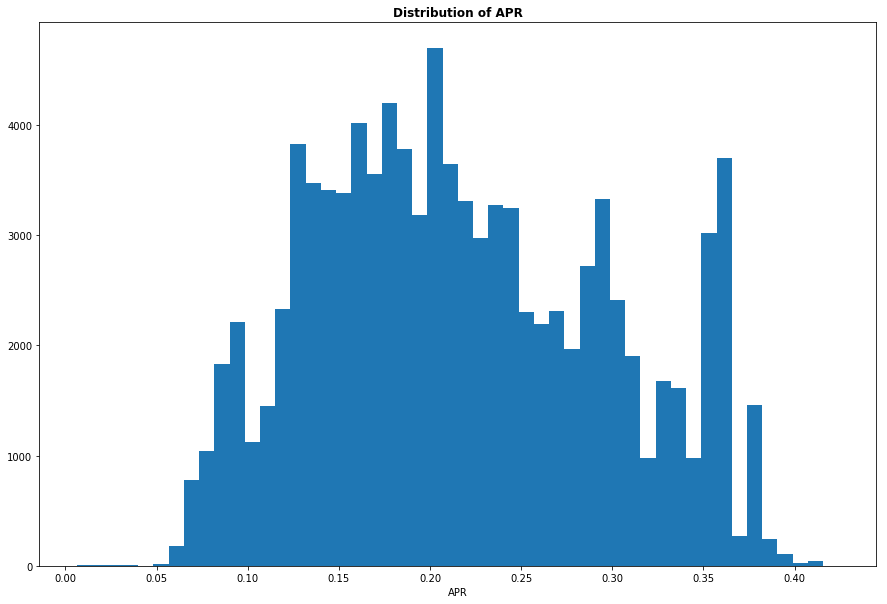

In [68]:
plt.figure(figsize=(15,10))
plt.hist(df.BorrowerAPR, bins=50)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
plt.title('Distribution of APR', {'fontweight':'bold'})
plt.xlabel('APR')
plt.show();

## Income Range for each occupation

This observation will help us determine which are the highest paying jobs from the given list. We can observe that the highest income proffessions are executives, computer programmers and engineers.

In [144]:
# value counts
occ_inc_counts = (df.groupby(['Occupation'])['IncomeRange']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('IncomeRange'))

# hue order
hueOrder = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed']

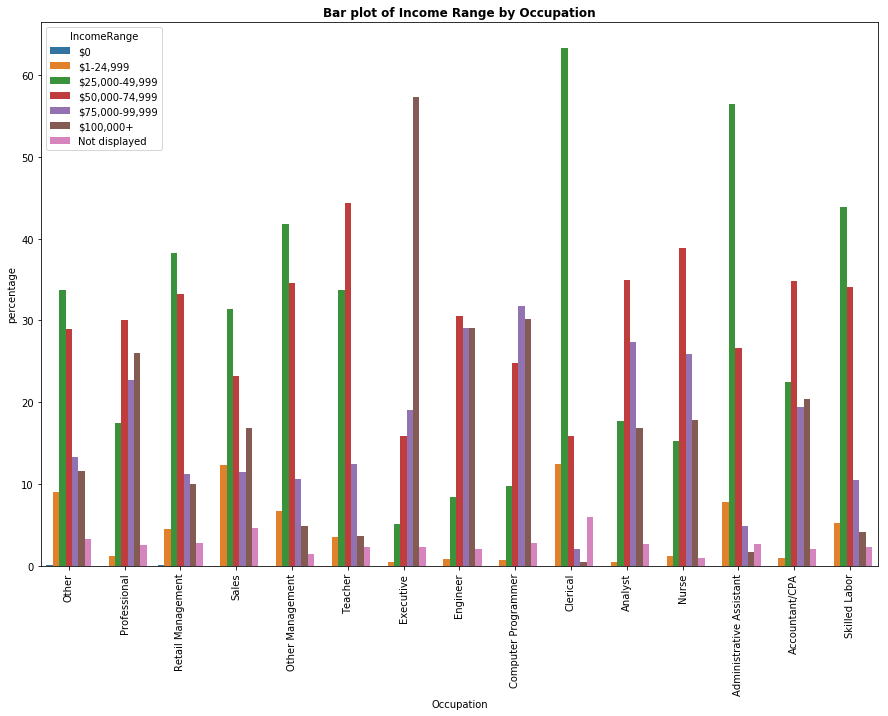

In [150]:
plt.figure(figsize=(15,10))
sb.barplot(data=occ_inc_counts, x='Occupation', y='percentage', hue='IncomeRange', hue_order=hueOrder)

plt.xticks(rotation=90)
plt.title('Bar plot of Income Range by Occupation', {'fontweight':'bold'})
plt.show();

## Distribution of Debt-to-Income ratio and Credit Score by Occupation

In this situation as well executives, computer programers and engineers have lowest debt to income ratio and highest Credit score. We can observe which proffessions are in more favorable position. Because higher income range is translated in lower debt to income ratio and higher credit score. 

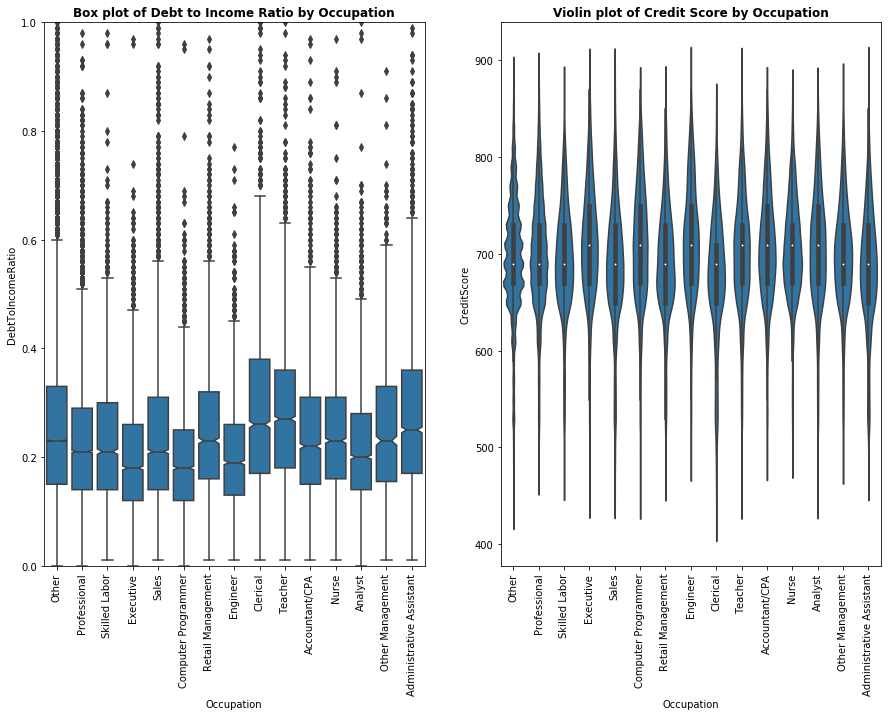

In [164]:
plt.figure(figsize=(15,10))

#plot 1
plt.subplot(1,2,1)
sb.boxplot(data=df, x='Occupation', y='DebtToIncomeRatio', color=sb.color_palette()[0], notch=True)
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.title('Box plot of Debt to Income Ratio by Occupation', {'fontweight':'bold'})

#plot 2
plt.subplot(1,2,2)
sb.violinplot(data=df, x='Occupation', y='CreditScore', color=sb.color_palette()[0])
plt.xticks(rotation=90)
plt.title('Violin plot of Credit Score by Occupation', {'fontweight':'bold'})

plt.show();

## Distribution of APR by Occupation

As we suspected, the same 3 occupations have lowest apr. We can observe the top side of violin plot getting narrower for high income proffessions. Never the less, there is still chance for other occupations to get better deal. Because as we can see minimum point of executives isn't minimum compared to other proffessions.

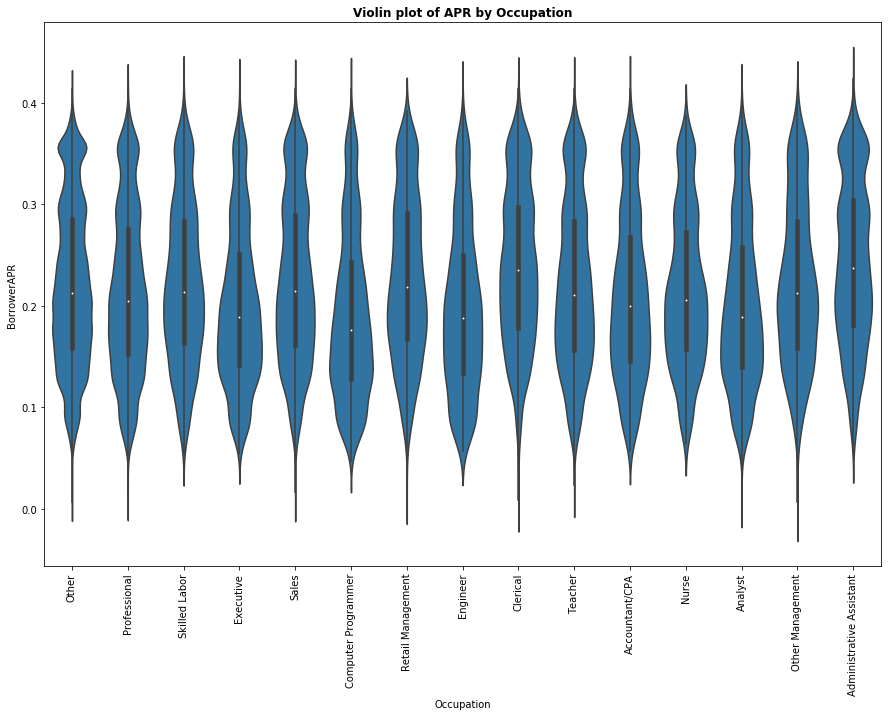

In [161]:
plt.figure(figsize=(15,10))
sb.violinplot(data=df, x='Occupation', y='BorrowerAPR', color=sb.color_palette()[0])
plt.xticks(rotation=90)
plt.title('Violin plot of APR by Occupation', {'fontweight':'bold'})

plt.show();

## Conclusion

As we observed certain occupations had higher median income and lower median debt to income ratio, which leads to lower APR compared to other occupations. These professions where engineer, executive and computer programer. But, as we observed, it didn't mean that these occupations were distributed on the lower end of the apr, which means it is still possible to get lower apr in the range you are given. You just have to improve one of these two factors, increase income, lower your debt to income ratio or even easier, improve your credit score.  

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [1]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 609895 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
